In [2]:
import gym
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

    - blue: passenger
    - magenta: destination
    - yellow: empty taxi
    - green: full taxi
    - other letters (R, G, Y and B): locations for passengers and destinations

In [18]:
env = gym.make("Taxi-v3").env
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [19]:
env.step(env.action_space.sample())
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)


### Qtable

In [64]:
Qtable = np.zeros([env.observation_space.n, env.action_space.n])
Qtable

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

### Hyperparameters

In [65]:
alpha = 0.1
gamma = 0.9
epsilon = 0.1 # %10 explore %90 exploit

### Plotting Metrics

In [66]:
rewardList = []
dropouts_list = []

### Train

In [67]:
episode_number = 10000
for i in range(1, episode_number):
    #initialize environment
    state = env.reset()
    rewardCount = 0
    dropouts = 0
    while True:
        #exploit or explore to find action
        if random.uniform(0,1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Qtable[state])
        
        #action process and take reward/ observation
        nextState, reward, done, _ = env.step(action)
        
        #Q learning function
        oldValue = Qtable[state, action]
        nextMax = np.max(Qtable[nextState])
        nextValue = (1-alpha) * oldValue + alpha * (reward + gamma * nextMax)
        #Qtable update        
        Qtable[state, action] = nextValue
        #update state
        state = nextState
        #find wrong dropouts
        if reward == -10:
            dropouts +=1
        
        rewardCount += reward
        
        if done:
            break
    if i % 10 == 0:
        dropouts_list.append(dropouts)
        rewardList.append(rewardCount)
        print ("Episode: {}, reward {}, wrong dropout {}".format(i,rewardCount, dropouts))
   

Episode: 10, reward -2362, wrong dropout 149
Episode: 20, reward -1928, wrong dropout 56
Episode: 30, reward -575, wrong dropout 22
Episode: 40, reward -720, wrong dropout 30
Episode: 50, reward -379, wrong dropout 8
Episode: 60, reward -281, wrong dropout 13
Episode: 70, reward -202, wrong dropout 6
Episode: 80, reward -333, wrong dropout 12
Episode: 90, reward -302, wrong dropout 11
Episode: 100, reward -279, wrong dropout 9
Episode: 110, reward -157, wrong dropout 7
Episode: 120, reward -480, wrong dropout 12
Episode: 130, reward -809, wrong dropout 38
Episode: 140, reward -132, wrong dropout 6
Episode: 150, reward -290, wrong dropout 7
Episode: 160, reward -162, wrong dropout 5
Episode: 170, reward -165, wrong dropout 5
Episode: 180, reward -80, wrong dropout 3
Episode: 190, reward -147, wrong dropout 4
Episode: 200, reward -16, wrong dropout 0
Episode: 210, reward -108, wrong dropout 4
Episode: 220, reward -265, wrong dropout 9
Episode: 230, reward -135, wrong dropout 6
Episode: 2

### Visualization

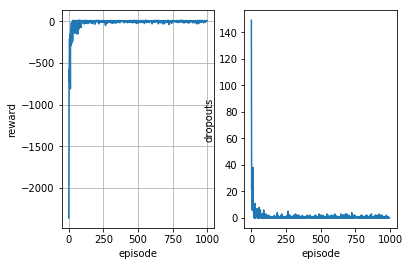

In [68]:
fig, axs = plt.subplots(1,2)
axs[0].plot(rewardList)
axs[0].set_xlabel("episode")
axs[0].set_ylabel("reward")
axs[0].grid(True)

axs[1].plot(dropouts_list)
axs[1].set_xlabel("episode")
axs[1].set_ylabel("dropouts")
axs[0].grid(True)

### Q Table Final State

In [84]:
actions = [" move south","move north", "move east", "move west", "pickup", "dropoff"]
pd.DataFrame(data=Qtable[:,:], index=list(range(0, 500)), columns=actions[:])  

,move south,move north,move east,move west,pickup,dropoff
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-1.153489,-1.163523,-1.652400,-1.466880,1.622615,-7.908735
2,2.017280,3.276821,1.955744,4.520918,7.714700,-3.238115
3,-0.609896,0.969111,-1.163642,0.735633,2.914016,-7.313922
4,-5.716145,-5.734746,-5.101937,-5.722747,-6.650579,-6.601044
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,-5.189280,-5.775277,-5.772460,-5.742731,-6.573133,-6.461303
7,-3.333162,-4.678324,-4.680839,-4.685679,-5.494652,-7.304724
8,1.399231,-3.174454,-3.226218,-2.838483,-6.762012,-5.256220
9,-2.468651,-5.145727,-5.145196,-5.054717,-8.108875,-8.460708
